# Descriptive Statistics Review

In this second part of the lab, we are going to continue working with the data that we cleaned in the last part. 
Be sure to continue to write clean code and comment your work well!

First, lets import our libraries and the data we saved. 

In [77]:
import pandas as pd
import matplotlib.pyplot as plt

import numpy as np
import seaborn as sns

In [2]:
diamonds = pd.read_csv('diamonds_clean.csv')
diamonds = diamonds.drop('Unnamed: 0', axis=1)

Now that we cleaned our data, we can proceed with some exploratory analysis. We will analyze the features that affect price the most.

Let's start by looking at how the charateristics of a diamond (especially the price, since that's our focus) change based on its color. Remember that you can use the `groupby()` method in pandas. 

**Using the `describe()` method, take a look on the dataset paying special attention to the variability. Comment what you see.**

In [3]:
#your code here
diamonds.describe()

,carat,cut,color,clarity,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53932.000000,53933.000000,53932.000000
mean,0.797940,3.904097,4.405803,4.051020,61.749405,57.457184,3932.799722,5.732007,5.734130,3.539788
std,0.474011,1.116600,1.701105,1.647136,1.432621,2.234491,3989.439738,1.119670,1.113108,0.691971
min,0.200000,1.000000,1.000000,1.000000,43.000000,43.000000,326.000000,3.730000,3.680000,1.410000
25%,0.400000,3.000000,3.000000,3.000000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,4.000000,4.000000,4.000000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,5.000000,6.000000,5.000000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,5.000000,7.000000,8.000000,79.000000,95.000000,18823.000000,10.740000,19.000000,8.060000


I see prices ranging from 326 to 18.8k, their distribution is right-skewed since mean > median. size dist are similar for x and y. 54k entries, completed dataset. carats ranging from 5.01 to 0.2, also right skewed. color is slightly right skewed, cut and clarity and table aren't as much.

Let's proceed to check each feature separately. 

**Before starting, which features do you think that will affect the price most and why? You will contrast your hypotheses with your results.**

carats and qualitative variables(cut, color, clarity). table too, i'm assuming it has a positive effect

## 1. The `color` column
First, let's look at the color column.

**For each different color, find the mean of each column. You should have a matrix with every color as rows and the columns `carat`, `clarity`, etc as columns.**

In [6]:
#your code here
colors = diamonds.groupby('color').mean()
colors

,carat,cut,clarity,depth,table,price,x,y,z
color,,,,,,,,,
1,1.162137,3.731838,3.776353,61.887215,57.812393,5323.818020,6.519338,6.517856,4.033251
2,1.026927,3.874585,3.964035,61.846385,57.577278,5091.874954,6.222826,6.222711,3.846368
3,0.911799,3.876927,3.933646,61.836850,57.517811,4486.669196,5.984776,5.981450,3.699145
4,0.771190,3.991233,4.463425,61.757111,57.288629,3999.135671,5.678549,5.681198,3.507965
5,0.736538,3.885559,4.133934,61.694582,57.433536,3724.886397,5.616727,5.620634,3.466246
6,0.657867,3.894355,3.969889,61.662090,57.491201,3076.752475,5.411580,5.416906,3.337767
7,0.657795,3.927380,3.691513,61.698125,57.404590,3169.954096,5.417851,5.421928,3.343320


**What do you see? Pay special attention to the relationship between price and color.**

There seems to be a negative correlation between both, even though it was said that colors with higher values are better. this might happen because the carats and size of the diamond is reducing in 'better' colors

Let's go further into the color feature. We will plot the frequency distribution of the diamonds color in our dataset. 

**Plot the distribution and analyze it. Remember that you can use the pandas `plot()` method.**

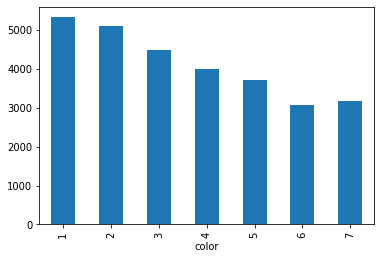

In [10]:
colors['price'].plot.bar()

The average value is definitely decreasing with the increase of color quality 

## 2.The `carat` column 

Let's check the `carat` (weight), since this could also be a potential factor for price change.

**Find the mean of each column for each value of `carat` using the `groupby` method. Then comment your results.**

In [26]:
#your code here
bins = pd.qcut(diamonds['carat'], [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
carats = diamonds.groupby(bins).mean()
carats

,carat,cut,color,clarity,depth,table,price,x,y,z
carat,,,,,,,,,,
"(0.199, 0.31]",0.292461,4.034408,4.740856,5.144606,61.767297,57.018273,655.294017,4.263985,4.276215,2.637094
"(0.31, 0.35]",0.330877,4.326965,4.641554,4.820669,61.641316,56.707534,750.733174,4.452505,4.458908,2.746001
"(0.35, 0.42]",0.395547,4.146283,4.803726,4.617229,61.681166,57.008781,922.498432,4.716373,4.725905,2.911710
"(0.42, 0.53]",0.497004,3.956130,4.933999,4.277517,61.748081,57.172464,1486.054642,5.085405,5.092456,3.141939
"(0.53, 0.7]",0.621343,3.938139,4.730859,4.121750,61.611601,57.363762,2090.247266,5.474628,5.481971,3.374431
"(0.7, 0.9]",0.785121,3.737422,4.467702,3.654193,61.855543,57.610109,3095.992857,5.901931,5.908872,3.652258
"(0.9, 1.01]",0.986130,3.310752,4.568531,3.371997,61.995648,58.326152,5039.209137,6.354834,6.349360,3.937030
"(1.01, 1.13]",1.062543,4.016619,4.227859,3.506014,61.626810,57.529915,5825.012683,6.555521,6.552639,4.038609
"(1.13, 1.51]",1.311859,3.832948,3.637145,3.643258,61.785707,57.813219,7944.263714,7.007425,6.997185,4.325476


In [36]:
bins = pd.cut(diamonds['carat'], [n/2 for n in range((int(diamonds['carat'].max())*2))])
carats = diamonds.groupby(bins).mean()
carats

,carat,cut,color,clarity,depth,table,price,x,y,z
carat,,,,,,,,,,
"(0.0, 0.5]",0.354826,4.101151,4.751690,4.805620,61.718107,57.007474,839.718149,4.534862,4.543756,2.801223
"(0.5, 1.0]",0.722035,3.785331,4.643379,3.829944,61.772032,57.547030,2811.342683,5.720739,5.725791,3.535076
"(1.0, 1.5]",1.147946,3.838474,4.033002,3.567828,61.753831,57.742123,6513.526534,6.702739,6.697012,4.136567
"(1.5, 2.0]",1.624213,3.780467,3.526879,3.507177,61.779032,57.990768,11321.774838,7.525949,7.517627,4.645183
"(2.0, 2.5]",2.107067,3.711288,2.781622,2.698809,61.723880,58.305445,14918.141237,8.215970,8.195533,5.064279
"(2.5, 3.0]",2.620213,3.372340,2.712766,2.031915,62.276596,58.404255,15472.904255,8.801064,8.743404,5.460213
"(3.0, 3.5]",3.076522,3.086957,2.565217,1.521739,62.360870,58.086957,14822.000000,9.277826,9.203478,5.760000
"(3.5, 4.0]",3.707500,3.000000,2.000000,1.750000,63.825000,56.500000,15636.500000,9.765000,9.715000,6.212500
"(4.0, 4.5]",4.162500,2.500000,1.750000,1.000000,63.525000,60.500000,16576.500000,10.097500,9.947500,6.390000


carat seems to be heavily correlated with price, positively, up until a certain plateau (~2 carats) after that it's sort of stable. Frequency analysis shows that around 90% of diamonds have less than 1.5 carats, so, this price relationship seems to be strong up until we arrive to the top % of diamonds.


**Plot a histogram of the `carat` column by using the `plot` method (see the docs to find an easy way to do so). What is happening?**

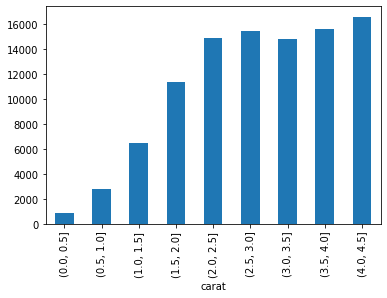

In [38]:
carats['price'].plot.bar()

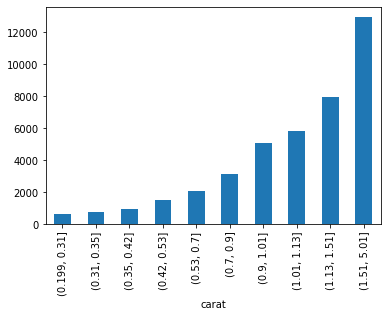

In [39]:
bins = pd.qcut(diamonds['carat'], [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
carats = diamonds.groupby(bins).mean()
carats['price'].plot.bar()

there seems to be a quadratic relation with price by size order

# 3. The `table` and `clarity` column
Finally, let's check the `table`.

**Find the mean of each column for each value of `table` using the `groupby` method. Then comment your results.**

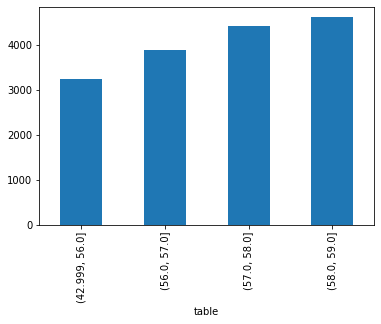

In [45]:
#your code here
bins = pd.qcut(diamonds['table'], [n/5 for n in range(5)])

table = diamonds.groupby(bins).mean()
table['price'].plot.bar()

the wider tables seem to have higher prices

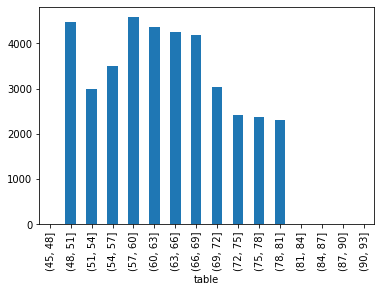

In [59]:
bins = pd.cut(diamonds['table'], [n for n in range(int(diamonds['table'].min()), int(diamonds['table'].max())) if n%3 == 0] )
tab = diamonds.groupby(bins).mean()
tab['price'].plot.bar()

The majority of the distribution is concentrated on a small range of table sizes and if you go to more extreme values the relationship seems to fade away. I'd still maintain the hypothesis that table sizes influence price due to the relative analysis

**Finally, do the same with the `clarity` column.**

In [60]:
#your code here
clarity = diamonds.groupby('clarity').mean()
clarity

,carat,cut,color,depth,table,price,x,y,z
clarity,,,,,,,,,
1,1.283846,2.974359,3.968961,62.734278,58.303779,3924.168691,6.761093,6.708300,4.224683
2,1.077648,3.666957,4.469980,61.772167,57.927181,5063.028606,6.404157,6.395573,3.952640
3,0.850482,3.747264,4.448450,61.853042,57.662541,3996.001148,5.888383,5.888256,3.640861
4,0.763935,3.978871,4.494208,61.724417,57.417401,3924.989395,5.658633,5.659782,3.492786
5,0.727158,4.000979,4.161792,61.667458,57.315151,3839.455391,5.572860,5.579966,3.437924
6,0.596202,4.116857,4.569483,61.663778,57.024990,3283.737071,5.218454,5.232118,3.221465
7,0.503321,4.228454,4.351573,61.624651,56.884460,2523.114637,4.961721,4.976437,3.062132
8,0.505123,4.432961,4.101676,61.510615,56.507207,2864.839106,4.968402,4.989827,3.061659


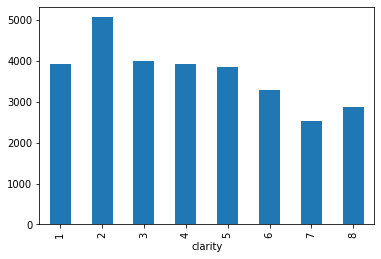

In [61]:
clarity['price'].plot.bar()

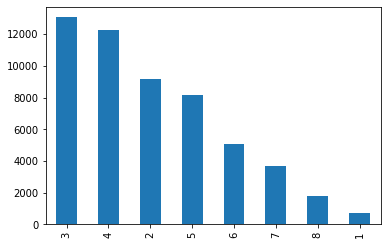

In [73]:
diamonds['clarity'].value_counts().plot.bar()

clarity has a weird behaviour, there seems to be a rarity of highest color-quality and lowest and quite an abundance of level 3, 4 and 2. the price-relation is not clear

**After looking at your results, which features do you think will affect price the most now? Regarding your hypotheses, do they match your final results? Provide a small overview.**

I don't know. need regression. It seems I was wrong about the color factor, but maybe theres a negative correlation with some other variable that has a bigger impact. The plateau on carats was interesting and unexpected

# 4. Taking a deeper look with plots and correlations

To take deeper look, we will use the `pairplot` method of `seaborn` library. This method plots a scatterplot for each pair of features and in the diagonal the distribution of the feature.

So if you have many features it will take a while, be careful!


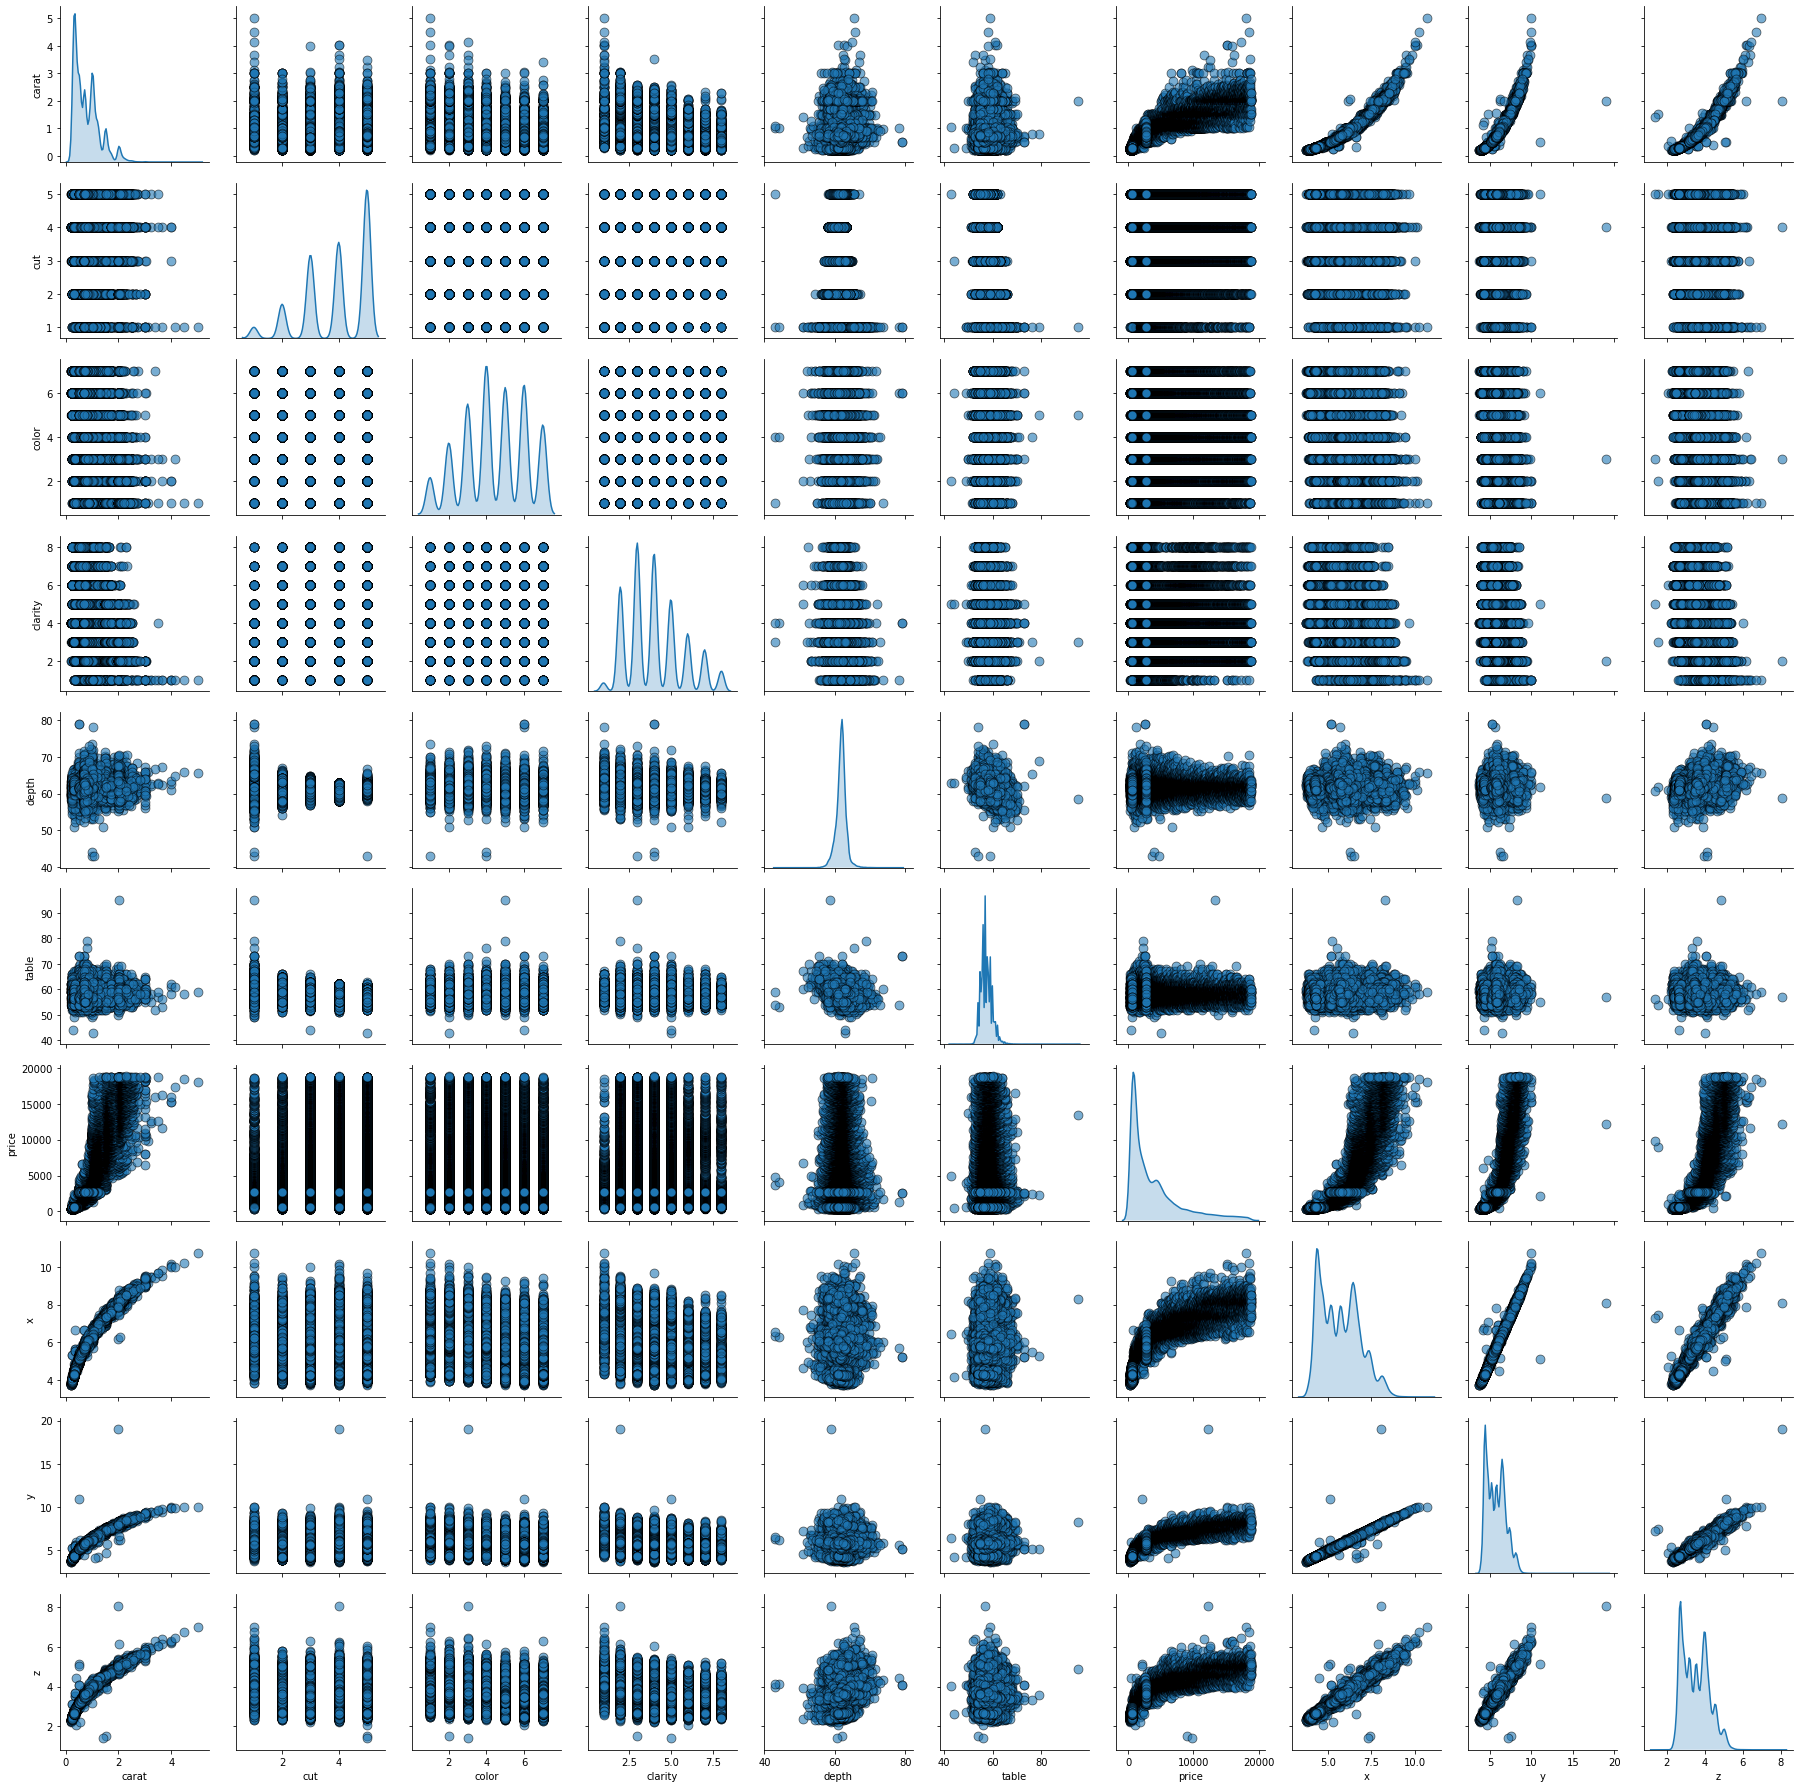

In [75]:
#Run this code
import seaborn as sns
sns.pairplot(diamonds, diag_kind = 'kde', plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'})

**What do you see here? What relationships between variables are the most interesting?**

In [ ]:
#your thoughts here
# THIS IS TOOO MUCH!
## Carat and price seem to have an exponential relation, wide enough
## to fit other determinators of price, qualitative and price is an 
## undistinguishable mess, table and depth seem to bare no relationship
## with price. Price distribution is heavily right skewed, xyz seem to have a similar pattern 
## towards carat and are, obviously, heavily correlated.

## Heavier diamonds seem to be more regular in terms of depth and table
## but are not wider or deeper, just more uniform

## it seems that most diamonds are very well cut and its dist looks linear.

## color dist looks normal, quite spread, slightly left skew

## clarity is right skewed

## depth looks normal with low stdev

## all size measures seem closer to chi-square than to normal. z seems to be less co-dependent than x and y

Now we will see a correlation matrix with a plot. As you know a higher correlation means that the feature could be an effect (**but is not for sure**) for the changes on the price.

We will see this with a matrix with colors. A lighter color means greater correlation. 

This is done with the `seaborn` library as well.

In [76]:
# your code here
diamonds.corr()

,carat,cut,color,clarity,depth,table,price,x,y,z
carat,1.000000,-0.134967,-0.291437,-0.352841,0.028224,0.181618,0.921591,0.977765,0.975740,0.976412
cut,-0.134967,1.000000,0.020519,0.189175,-0.218055,-0.433405,-0.053491,-0.126272,-0.125562,-0.152331
color,-0.291437,0.020519,1.000000,-0.025631,-0.047279,-0.026465,-0.172511,-0.270780,-0.270226,-0.274978
clarity,-0.352841,0.189175,-0.025631,1.000000,-0.067384,-0.160327,-0.146800,-0.373009,-0.367302,-0.376590
depth,0.028224,-0.218055,-0.047279,-0.067384,1.000000,-0.295779,-0.010647,-0.025097,-0.028576,0.096327
table,0.181618,-0.433405,-0.026465,-0.160327,-0.295779,1.000000,0.127134,0.196130,0.189540,0.155812
price,0.921591,-0.053491,-0.172511,-0.146800,-0.010647,0.127134,1.000000,0.887227,0.887837,0.882063
x,0.977765,-0.126272,-0.270780,-0.373009,-0.025097,0.196130,0.887227,1.000000,0.997507,0.991002
y,0.975740,-0.125562,-0.270226,-0.367302,-0.028576,0.189540,0.887837,0.997507,1.000000,0.990593
z,0.976412,-0.152331,-0.274978,-0.376590,0.096327,0.155812,0.882063,0.991002,0.990593,1.000000


**What do you see here? Regarding the results before, does it fit with them?**

yes.

Finally, we will calculate the linear regression between the price and the weight. This will be done first by plotting it with the `seaborn` library and then calculating the error with the `scipy` library.

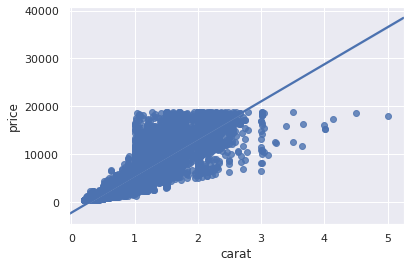

In [81]:
# your code here
sns.set(color_codes=True)
tips = sns.load_dataset("diamonds")
sns.regplot(x="carat", y="price", data=diamonds)

array([[-472.38268791],
       [-627.51120027],
       [-472.38268791],
       ...,
       [3173.13735253],
       [4414.16545141],
       [3560.95863343]])

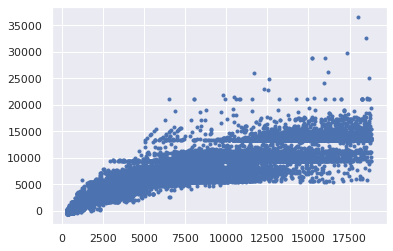

In [124]:
from sklearn.linear_model import LinearRegression
from scipy import stats
lm = LinearRegression()

X = diamonds.loc[:, 'carat'].values.reshape(-1, 1)
Y = diamonds.loc[:, 'price'].values.reshape(-1, 1)
reg = lm.fit(X, Y)
reg.predict(X)
Y_pred = lm.predict(X)
abs(Y-Y_pred)
plt.scatter(Y, Y_pred, marker = '.', c = 'b')
#plt.plot(X, Y_pred, color='b')
Y_pred

**What do you think?**

In [ ]:
errors = pd.DataFrame(sorted(abs(Y-Y_pred)))
errorsbins = pd.qcut(errors[0], [n/100 for n in range(0,101)])
errordist = errors.groupby(errorsbins).count().plot()

## this is no normal error distribution

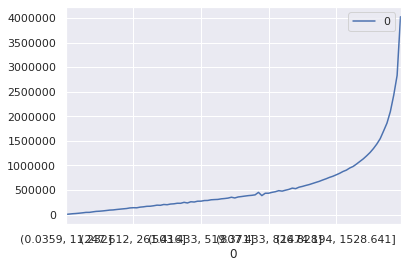

In [163]:
errordist = errors.groupby(errorsbins).sum().plot()
##relationship is exponential - heteroskedasticity confirmed

I think the function is badly defined. the error distribution is not normal, there seems to be heteroskedasticity 

**Would you do any other checks on other features? Do you have any comments regarding `carat`?**

In [ ]:
#your thoughts here

## the relationship seems to be of the log type, so I'd normalize it and go from there

**Conclusion**

**From our dataset** we can conclude that although `color` and `clarity` have a classification, and thus an assigned importance or weight, they do not influence the monetary value of a diamond in determining way. While it is true that different colors or clarities may have different prices, upon closer examination those variations in price seem to be linked to `carat` (weight) and its `dimensions`. In our analysis, the key factor to determining a diamond's value was placed solely in the aforementioned features, since we can see in our correlation coefficients and in the coefficient of determination that these features are closely related.